In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df_categorical=[feature for feature in df.columns if df[feature].dtypes=='O']
df_categorical

['sex', 'smoker', 'region']

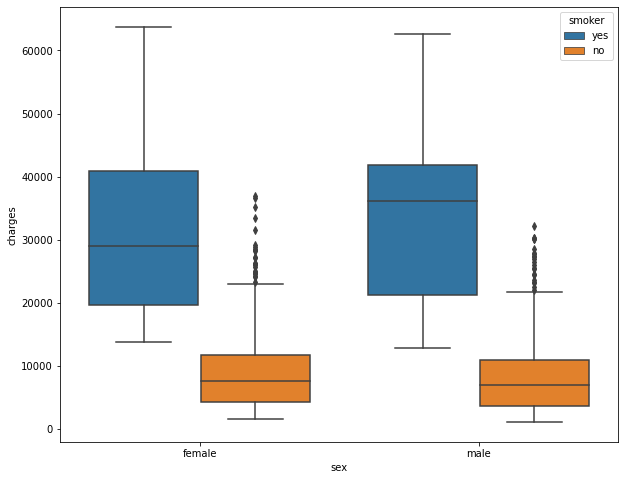

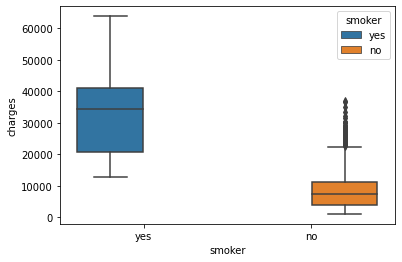

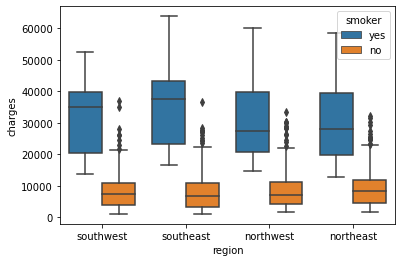

In [7]:
plt.figure(figsize=(10,8))
for feature in df_categorical:
    sns.boxplot(x=feature,y='charges',data=df,hue='smoker')
    plt.show()

In [8]:
num_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
num_feature

['age', 'bmi', 'children', 'charges']

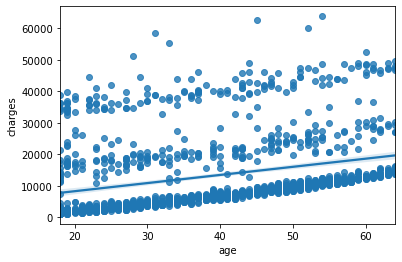

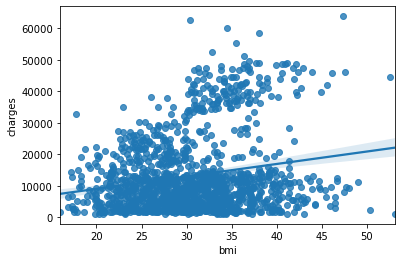

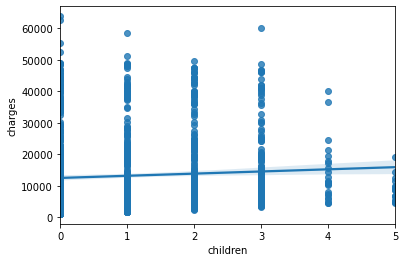

In [9]:
for feature in num_feature:
    if feature!='charges':
        sns.regplot(x=feature,y='charges',data=df)
        plt.show()

In [10]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

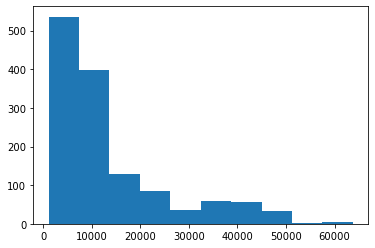

In [11]:
plt.hist(df['charges'])

In [12]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
for feature in df_categorical:
    df[feature]=en.fit_transform(df[feature])
    

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
x=df.drop('charges',axis=1)
y=df.charges
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)

In [15]:
from xgboost import XGBRegressor
model=XGBRegressor(base_score=1)
model.fit(x_train,y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
y_pred=model.predict(x_test)
y_pred

array([ 7449.003  ,  1654.6802 , 18116.586  , 47660.5    ,  8258.784  ,
       12201.808  , 34580.348  , 41031.516  ,  9938.359  , 13451.269  ,
        7900.91   ,  9184.394  , 13679.052  ,  7943.337  ,  9712.177  ,
       13957.861  , 22714.03   ,  1548.704  , 16829.879  ,  1066.8646 ,
       11729.618  , 16655.082  , 39676.848  , 12138.844  , 44622.215  ,
       13158.24   , 22711.092  , 40934.633  , 16665.451  , 14111.854  ,
        4848.491  ,  9943.581  , 13716.496  ,  2315.4739 ,  2655.0044 ,
       45290.41   ,  8460.679  , 36756.094  ,  7110.6826 ,  3351.285  ,
        8241.024  , 10208.274  , 49145.453  , 16072.941  , 42735.22   ,
        1356.6014 , 15459.599  , 17449.264  ,  9327.522  , 24209.969  ,
       17321.607  , 21100.352  ,  5593.245  , 28126.889  ,  9802.611  ,
       11233.3545 ,  6027.2866 ,  4707.0405 ,  6134.2646 ,  5990.919  ,
       25861.514  , 14473.148  ,  8802.773  , 12490.623  , 12367.231  ,
        8099.313  , 33694.86   ,  9658.919  ,  2965.7874 , 34921

In [17]:
from sklearn.metrics import r2_score

In [18]:
score=r2_score(y_test,y_pred)
score

0.849433161891084